# Used Equipment Pricing

## ECON 611 | Drew Sandberg

### Housekeeping Section
Below is code related to Python module (library) management.

In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from pandas.plotting import table
from econ611_stats import *

In [2]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin']=.01

### Data Pulls
Data pulls are managed in a seperate notebook in this directory  **Project Data Pulls.ipynb**. The data was previously pulled and landed in the repository folder. I did this to minimize the number of pulls on the service and to expedite the import process.

In [3]:
filename = 'Ag Mfg Stock Close.csv'
stock_close = pd.read_csv(filename)
stock_close['Date'] = pd.to_datetime(stock_close['Date'])
stock_close.set_index('Date', inplace=True)

filename = 'Commodity PPI.csv'
commodity_df = pd.read_csv('Commodity PPI.csv')
commodity_df['DATE'] = pd.to_datetime(commodity_df['DATE'])
commodity_df.set_index('DATE', inplace=True)

filename ='Breakeven Rates.csv'
breakeven_df = pd.read_csv(filename, index_col = 'DATE')
breakeven_df.dropna(axis=0, how="any", inplace=True)

filename = 'Metals.csv'
metals_df = pd.read_csv(filename)
metals_df['DATE'] = pd.to_datetime(metals_df['DATE'])
metals_df.set_index('DATE', inplace=True)

filename = 'Equipment PPI.csv'
equipment_df = pd.read_csv(filename)
equipment_df['DATE'] = pd.to_datetime(equipment_df['DATE'])
equipment_df.set_index('DATE', inplace=True)

filename = 'Employment.csv'
employment_df = pd.read_csv(filename)
employment_df['DATE'] = pd.to_datetime(employment_df['DATE'])
employment_df.set_index('DATE', inplace=True)

filename = 'Steel.csv'
steel_df = pd.read_csv(filename)
steel_df['Date'] = pd.to_datetime(steel_df['Date'])
steel_df.set_index('Date', inplace=True)

filename = 'Federal Reserve Assets.csv'
fed_asset_df = pd.read_csv(filename, index_col = 'DATE')

filename = 'US Currency in Circulation.csv'
fed_currency_df = pd.read_csv(filename, index_col = 'DATE')

filename = 'Equipment Orders.csv'
equip_df = pd.read_csv(filename)

farm_income_df = pd.read_csv('USDA_ERS Farm Income.csv')
farm_expense_df = pd.read_csv('USDA_ERS Farm Expense.csv')

## Project Background

When this project was initially conceived, I expected to explore sale prices for used agriculture equipment, specifically used John Deere row crop tractors. As a data analyst for R. D Offutt Company, I've heard from salespersons of anecdotal reports of how scarce John Deere equipment has become. Scarcity, regardless of real or perceived, appears to have intensified competitive bidding for quality used equipment. Generally, John Deere, like several other equipment manufacturers have struggled to produce equipment at the same rate since the start of the COVID-19 pandemic as they were able to prior. John Deere equipment dealerships like [RDO Equipment Company](www.rdoequipment.com), they have limited inventories of new equipment and a persistent customer demand for new equipment. Consequently, the RDO Equipment salespersons have been able to ask and receive a premium margin on new equipment as well as sell used equipment at prices generally deemed higher than typical pricing.

Shortly after starting the project, I hoped to find cues that might be useful in determining when the pricing trend might change. In my discussions with RDO Equipment sales leadership, their greatest concern is paying premiumus on trade-in equipment when the market demand softens. No business wishes to build an oversized used equipment inventory and especially not one where the the company's input cost exceeds what the retail market is willing to pay. An analyst’s success in providing meaningful insight to the sales teams requires the analyst understanding which market signals are available and which of those signals might be leading or trailing indicators. Midway through this project, I felt that I might make use of predicted asking prices on John Deere’s Machine Finder Pro website. Before this class, I had used the Machine Finder Pro data to build a multiple regression model to predict the asking prices for row crop tractors. Exploration of the prediction data led to more questions than the prediction model could answer due to inconsistencies in the quantities by equipment models, model year, and listed retail prices.

Secondary to my intent of discovering the factors signaling a change in equipment demand, I am also interested in understanding which factors might explain the quick increase in John Deere's stock price. As of December 1, 2021, John Deere's closing stock price was \\$341.55 and just prior to the COVID-19 pandemic, the stock traded around \\$150 per share.

This paper will explore:
- Stock price of leading agricultural manufacturers and steel manufacturers
- Producer Price Index for agricultural equipment, crop commodities, and steel manufactures
- Farm income and expenses
- Employment numbers in durable equipment manufacturing
- Inflation breakeven rates
- Federal Reserve assets



### Economist F. A. Hayek's Writings
Professor Caton introduced me to Friedrich Hayek's writings and suggested I explore his writings on equilibrium the production of consumers' and producers' goods. Again, in full disclosure, I'm not well-versed in economics and spent time steeping myself in the gait and rythym of his words. I pulled together a synopsis of his second lecture, but admittedly, my synopis feels a bit hollow; I'm uncomfortable with analysis of his words and equally uncomfortable that I have a real conclusion about his positions.

In Hayek's second lecture (LVMI, 2008) he refers to land (e.g. real property) and labor as **original means of production** and **factors of production** refers to concepts of wages, rent, interest. To the receipients ("owners") of these factors of production, this is income which can be used to purchase consumer goods. In Hayek's lectures, he proposes three primary arguments responsible for variation in industrial output.
- Individuals' willingess to increase or expand their effort.
- Changes in the amount of producers' inputs.
- Changes in consumption patterns of existing resources.

Hayek's arguments suggest that changes in rent, wages and interst are perhaps inversely proportional to  changes in production. Reduction of wages could reflect in more capital available to producers for use in production; contraction in interest rates could also increase capital available to producers. Conversely, increase in wages and interest rates should reduce production capacity. A key distinction in Hayek's lecture is that idled resources are not required for a company to increase production. In the Hayek's third argument in the second lecture, Hayek expresses less concerned about *how* resources are currently used, but emphasises how resources positioned for future use to explain changes to equilibrium in production of producers' and consumers' goods.

Application of Hayek's writings to situation where John Deere's production volumes have decreased and higher-than-typical prices for used ag equipment suggests that one should be able to observe changes to John Deere's inputs as well as consumers' consumption patterns (e.g. "demand"). This paper will explore input costs associated with equipment manufacturers and related industries as well as investigate potential causes of consumer demand. A final, speculative thought on consumer demand suggests that the [right-to-fix movement](https://www.repair.org/agriculture) could have significant impact on ag equipment sales. Generally, speaking, those who own the equipment want tools and access to repair items for themselves. Consider the story of one farmer who appears to have [ran afoul of copyright laws](https://www.npr.org/sections/alltechconsidered/2015/08/17/432601480/diy-tractor-repair-runs-afoul-of-copyright-law ) while hoping to fix his tractor.

### Might the limits of steel production capacity be responsible for used ag equipment prices?
Might the lack of production from the U.S. steel industry be responsible for increases in the used ag equipment prices? Again, I’m not a great economist mind, but my data explorations reveal a few things. First, agriculture equipment manufacturer’s stock prices follow a similar pattern over the last five years; stock prices have increased post COVID-19; no big news there. Input costs for ag equipment manufacturers have increased sharply over the past 18 months. Besides labor expenses, I assume raw material input costs, like steel and aluminum, are among the top handful of cost drivers. In mid-2018, producer price indexes related to production of ag equipment increase quickly; presumably those specific increase are related to steel and aluminum tariffs. Third, the Producer Price Index for steel manufacturers has seen sharp increases in the past several months, too. Since the start of the COVID-19 pandemic, the Federal Reserve has increased their assets on their balance sheet; this may not be relevant to cost drivers, but some observations of casual reporting indicate that Fed asset purchases may have unintended effects of propping up commodity prices. Finally, and perhaps the biggest discovery is that the Industrial Production index related to the production of steel goods, while increasing over the last 18 months, remains on whole, flat. 

Since most of the current economic challenges inflect at the onset of the COVID-19 pandemic, the curious component is steel production volumes. Conventional logic says at the outset of the pandemic, orders for steel should have slowed and production should have slowed, too. The steep drop in production numbers is reflected in the Fed’s Industrial Production indexes for steel and while economy appears to be accelerating, presumably orders for steel have increased, too. However, given current production capacity, steel manufacturers likely can’t produce volume to offset production effort lost to the pandemic related shutdowns.


### John Deere Stock Price (Ticker Symbol: DE)

In the visualization below, John Deere's stock price had reached roughly \\$170 per share just prior to the COVID-19 pandemic shutdowns in March 2020. With the shutdown, the stock price retreated back near \\$100. As the summer of 2020 progressed, the stock prices steadily increased more than 200% and now trades around \\$350 per share. 

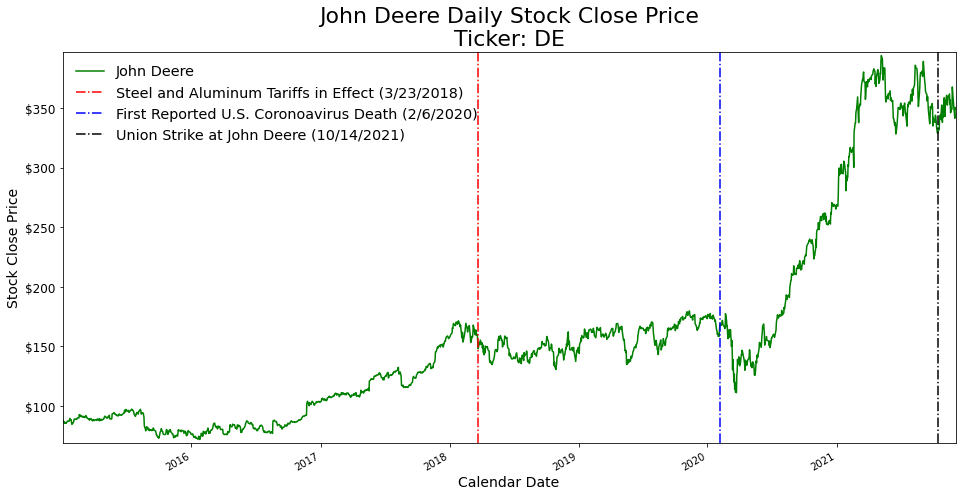

In [4]:
jd = stock_close[['John Deere']]

fig, ax = plt.subplots(figsize = (16,8))
jd.plot.line(ax=ax, legend=True, color="green")

# y axis
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels(["$"  + str(int(y)) for y in ticks_loc], fontsize = 12)
ax.set_ylabel("Stock Close Price", size = 14, color = "black")

# x axis
ax.set_xlabel("Calendar Date", size = 14, color = "black")
plt.axvline(datetime.datetime(2018, 3, 23), color = 'red', linestyle='-.', label = 'Steel and Aluminum Tariffs in Effect (3/23/2018)')
plt.axvline(datetime.datetime(2020, 2, 6), color = 'blue', linestyle='-.', label = 'First Reported U.S. Coronoavirus Death (2/6/2020)')
plt.axvline(datetime.datetime(2021, 10, 14), color = 'black', linestyle='-.', label = 'Union Strike at John Deere (10/14/2021)')

plt.title("John Deere Daily Stock Close Price\nTicker: DE", fontsize = 22)
plt.legend(frameon=False, fontsize="x-large")

plt.savefig('JD Stock Price.png')

## Stock Prices for Agricultural Equipment Manufacturers
Perhaps John Deere is an isolated case within the sector; however, a review of stock prices for selected ag equipment manufacturers since January 2015, one may observe the same change pattern. I've selected a date range covering three presidential administrations (later half of Obamas's second administration, the Trump administration, and the first Year of Biden's administration) and including an enduring global pandemic. The following companies were included in the chart:

[John Deere (Ticker: DE)](https://www.deere.com/en/index.html) is a globaly leader in equipment manufacturing for agriculture, construction, forestry markets.

[CNH Industrial (Ticker: CNHI)](https://www.cnhindustrial.com/en-us/Pages/homepage.aspx) similar to John Deere in scope, CNH Internation manufactures agricultural and construction equipment as well as commercial transportation vehicles.

[AGCO (Ticker: AGCO)](https://www.agcocorp.com/) is an equipment manufacturer, similar in scope to John Deere. AGCO produces the Massey-Ferguson and Fendt branded equipement.

[Titan International (Ticker: TWI)](https://www.titan-intl.com/), which produces wheel assemblies, tires, and undercarriage products for the equipment industry. Interesting fact: Titan produces the Titan and Goodyear Farm Tire brands. Arguably, Titan International, due in part that it manufactures sub-assemblies for other equipment manufacturers, may have an inordinate risk associated with increases in steel and aluminum prices.

[Alamo Group (Ticker: ALG) ](https://www.alamo-group.com/) appears to be a holding company for various manufacturers of industrial mowing, cutting, griding equipment. In short, much of what Alamo Group produces would usually become attachments to tractors and other heavy machinery. 

Also, [Lindsay Corporation (Ticker: LNN)](https://www.lindsay.com/usca/en/) an irrigation equipment manufacturer with a division of highway barrier products. Interesting, [Valmont Industries](https://www.valmont.com/about-us) which owns the Valley Irrigation brand, is a private, foreign-owned business. R. D. Offutt Company has a Valley Irrigation equipment dealership based in Wadena, Minnesota.

All companies experienced sharp drops in stock price closing data in second quarter of 2021 (Q2 2021), presumably this was a market response to the COVID-19 pandemic affecting the United States. Since the start of the pandemic, most all are trading higher than the start of the pandemic.

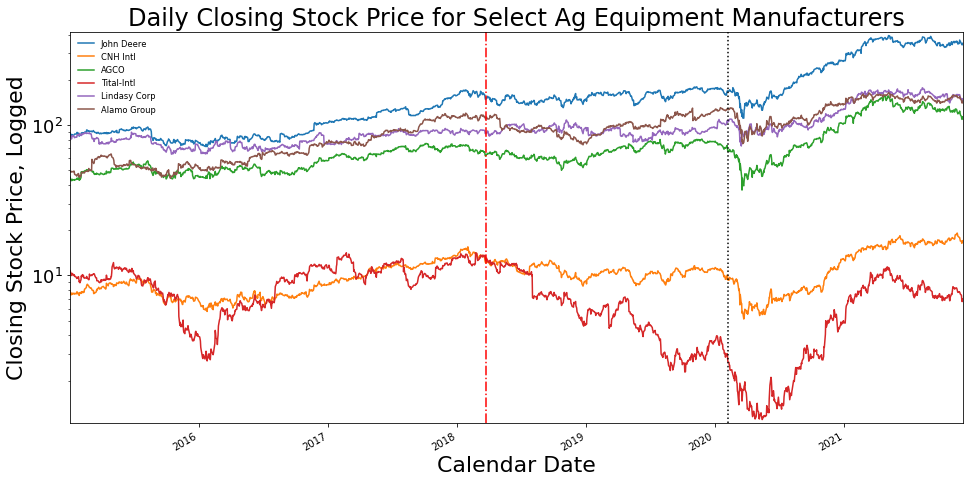

In [5]:
# Set up figure
fig, ax = plt.subplots(figsize = (16,8))

ticker_labels = stock_close.keys()

# Plot the line(s)
stock_close.plot.line(ax=ax, legend=True)

# Y axis stuff
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels(["$" + str(int(y)) for y in ticks_loc], fontsize = 18)
plt.axvline(datetime.datetime(2020, 2, 6), color = 'black', linestyle=':', label = 'First Reported U.S. Coronoavirus Death (2/6/2020)')
plt.axvline(datetime.datetime(2018, 3, 23), color = 'red', linestyle='-.', label = 'Steel and Aluminum Tariffs in Effect (3/23/2018)')

# Plot items
ax.legend(labels = ticker_labels, loc = 'upper left', fontsize = 'small', frameon=False)
plt.yscale('log')
plt.xlabel("Calendar Date", fontsize = 22)
plt.ylabel("Closing Stock Price, Logged", fontsize = 22)
plt.title("Daily Closing Stock Price for Select Ag Equipment Manufacturers", fontsize = 24)

plt.savefig('Equipment Mfg Stock Prices.png')

## Farm Income and Expenses

The U. S. Deparment of Agriculture's Economic Research Service tallies data related to farm incomes. In the Farm Income figure below, the proportions of different subcategories of income (e.g. crops, animals, direct government payments, etc.) generally appear stable. However, in 2019 and 2020, one can see a change of proportion for 'Direct Government Payments' to farmers. In the 'Farm Expenses' graphich below, I've highlighted two subcategories of expenses with interesting rates of change over the last six years. Input costs related to chemicals, fertilizers, seed, feed, stock and poultry purchases have steadily increased since the pandemic began.

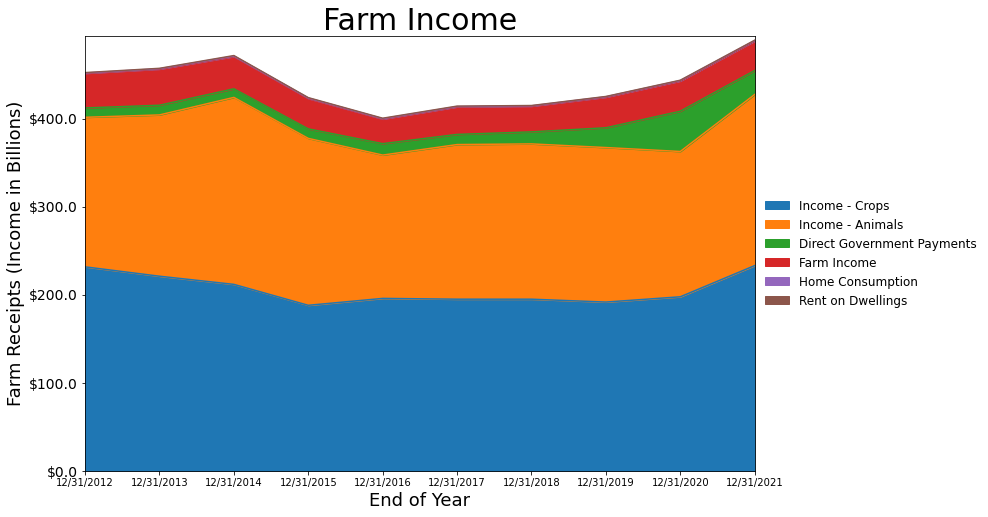

In [6]:
farm_income_df = pd.read_csv('USDA_ERS Farm Income.csv', index_col = 'Type')
farm_inc_df = farm_income_df.T
farm_inc_df.index.rename('Date', inplace=True)

fig, ax = plt.subplots(figsize = (12,8))

farm_inc_df.plot.area(ax = ax, legend=True)

# y axis
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels(["$"  + str(int(y)/1000000) for y in ticks_loc], fontsize = 14)
ax.set_ylabel("Farm Receipts (Income in Billions)", size = 18, color = "black")

# x axis
ax.set_xlabel("End of Year", size = 18, color = "black")

plt.title("Farm Income", fontsize = 30)
plt.legend(frameon=False, fontsize="large", loc="center left", bbox_to_anchor=(1.0, 0.5))

plt.savefig('Farm Income.png')

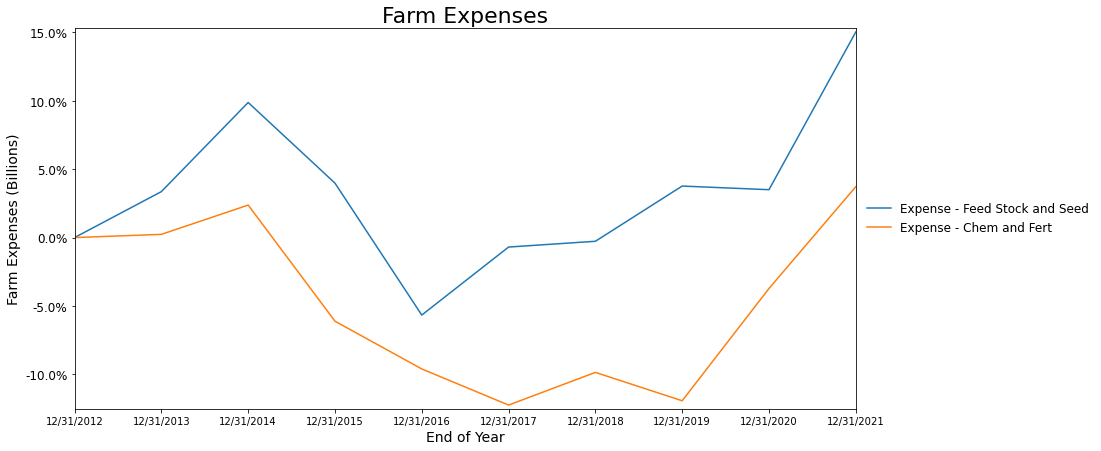

In [7]:
farm_expense_df = pd.read_csv('USDA_ERS Farm Expense.csv', index_col = 'Type')
farm_exp_df = farm_expense_df.T
# farm_inc_df = farm_inc_df.set_index('Type')
farm_exp_df.index.rename('Date', inplace=True)

epc = farm_exp_df[['Expense - Feed Stock and Seed', 'Expense - Chem and Fert']].pct_change().cumsum()
epc.fillna(0,inplace=True)

fig, ax = plt.subplots(figsize = (14,7))
epc.plot.line(ax = ax, legend=True)

# y axis
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels([str(round((y*100),0)) + '%' for y in ticks_loc], fontsize = 12)
ax.set_ylabel("Farm Expenses (Billions)", size = 14, color = "black")

# x axis
ax.set_xlabel("End of Year", size = 14, color = "black")

plt.title("Farm Expenses", fontsize = 22)
plt.legend(frameon=False, fontsize="large", loc="center left", bbox_to_anchor=(1.0, 0.5))

plt.savefig('Farm Expenses.png')

## Equipment Orders 

In the 'Ag Tractors Pending Delivery' visualization below, I've charted the number of pending deliveries of a specific class of John Deere tractors. For privacy and business sensitivity issues, I'm not inclined to be more specific on the models, prices, or locations of the orders. However, I feel the aggregate data for number of items on order and the average expected delivery times corroborate salespersons' anecdotal reports of limited inventory available to sell. The graphic also adds context to why ag equipment dealerships' sales lots appear a bit sparse. Overall, the number of unfulfilled orders continues to increase and the average time on order is approaching four months and the average expected delivery date approaches nearly seven months since the order was placed.

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_8620/160366102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf['Date'] = pd.to_datetime(edf['Date'])


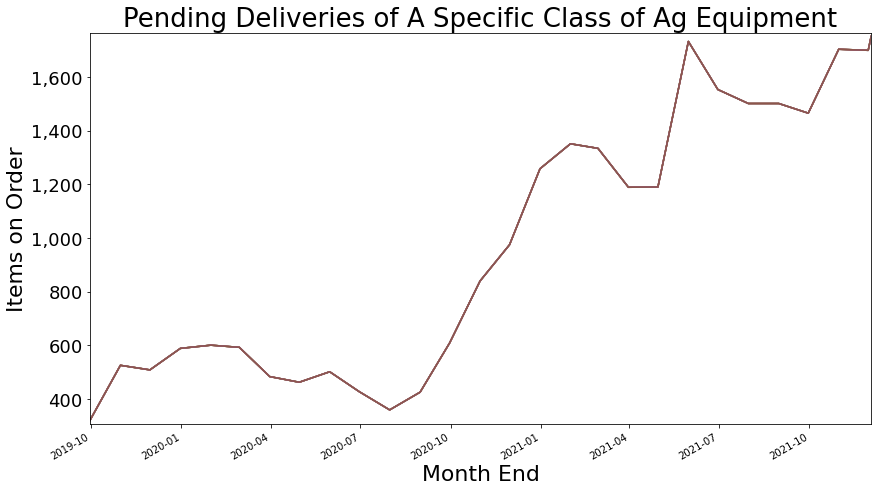

In [8]:
edf = equip_df[equip_df['isTractor'] == 1]
edf['Date'] = pd.to_datetime(edf['Date'])
wait_time_df = edf.groupby(['Date']).mean().sort_index(axis=0)
equip_count_df = edf.groupby(['Date']).count().sort_index(axis=0)
# Set up figure
fig, ax = plt.subplots(figsize = (14,8))

# Plot the line(s)
equip_count_df.plot.line(ax=ax, legend=False)

# Y axis stuff
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))

# {:,.0f}'.format(x) for x in current_values
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ticks_loc], fontsize = 18)

# Plot items
plt.xlabel("Month End", fontsize = 22)
plt.ylabel("Items on Order", fontsize = 22)
plt.title("Pending Deliveries of A Specific Class of Ag Equipment", fontsize = 26)
plt.savefig('PendingTractorDeliveries.png')

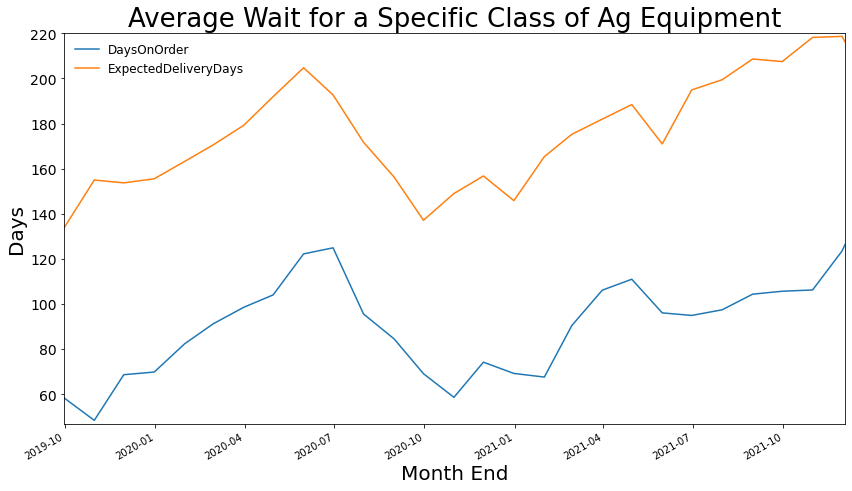

In [9]:
wait_df = wait_time_df.drop(columns=['isTractor'])
# Set up figure
fig, ax = plt.subplots(figsize = (14,8))

# Plot the line(s)
wait_df.plot.line(ax=ax, legend=True)

# Y axis stuff
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))

# {:,.0f}'.format(x) for x in current_values
ax.set_yticklabels(['{:,.0f}'.format(y) for y in ticks_loc], fontsize = 14)

# Plot items
plt.legend(frameon=False, fontsize = "large")
plt.xlabel("Month End", fontsize = 20)
plt.ylabel("Days", fontsize = 20)
plt.title("Average Wait for a Specific Class of Ag Equipment", fontsize = 26)
plt.savefig('PendingDeliveryTime.png')

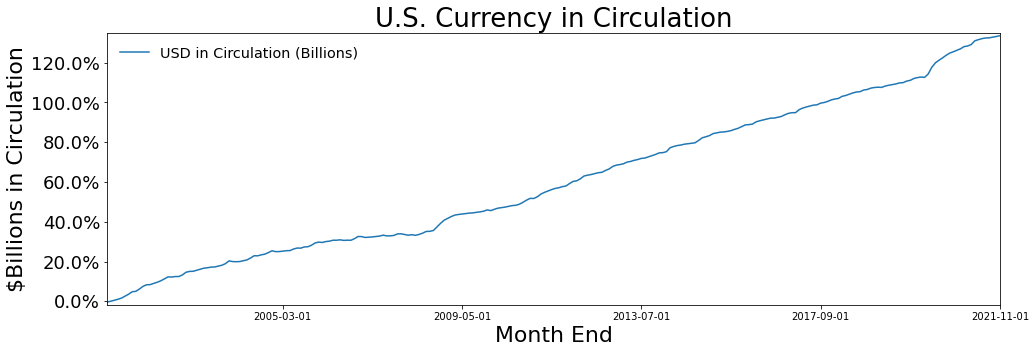

In [10]:
curr_pct_change = fed_currency_df.pct_change().cumsum()

# Set up figure
fig, ax = plt.subplots(figsize = (16,5))

# Plot the line(s)
curr_pct_change.plot.line(ax=ax, legend=True)

# Y axis stuff
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))


# {:,.0f}'.format(x) for x in current_values
ax.set_yticklabels([str(round(y*100,0)) + "%" for y in ticks_loc], fontsize = 18)

# Plot items
plt.xlabel("Month End", fontsize = 22)
plt.ylabel("$Billions in Circulation", fontsize = 22)
plt.title("U.S. Currency in Circulation", fontsize = 26)
plt.legend(frameon=False, fontsize = 'x-large')
plt.savefig('Currency In Circulation.png')

## Commodity Prices for Common Row Crops
In reviewing crop acre data from United States Department of Agriculture, Farm Service Agency (FSA) (2021), more than one-third of all ag production acres were planted as corn, wheat, or soybeans. While I assume that commodity prices should have little to no influence on equipment manufacturing input prices, I've often hear anecdotal stories suggesting commodity prices are barometers to equipment demand. The assumption is producers, flush with the proceeds from higher commodity prices, will replace or add to their equipment fleet. Unfortunately, I've not yet found a reliable source for units of equipment sold, by month. I would like to apply some rigor to evaluating the old maxim -- high commodity prices drive demand for equipment -- but until I find the data, I'll have to refer to the maxim to guide my intuition.

The following visualizations show the distribution of month-to-month percent of change. While the visualization has the top three crops, by planted acres in 2021, there are numerous other crops with their respective Producers Price Index. To say that potato producers (i.e., farmers) have the most volative input prices would be stretch as we've not looked at other crop types. However, by comparison, it might be interesting to Offutt Farms to see volatility in monthly input prices is generally worse when compared to corn, wheat, and soybeans. I can only speculate to the underlying causes.

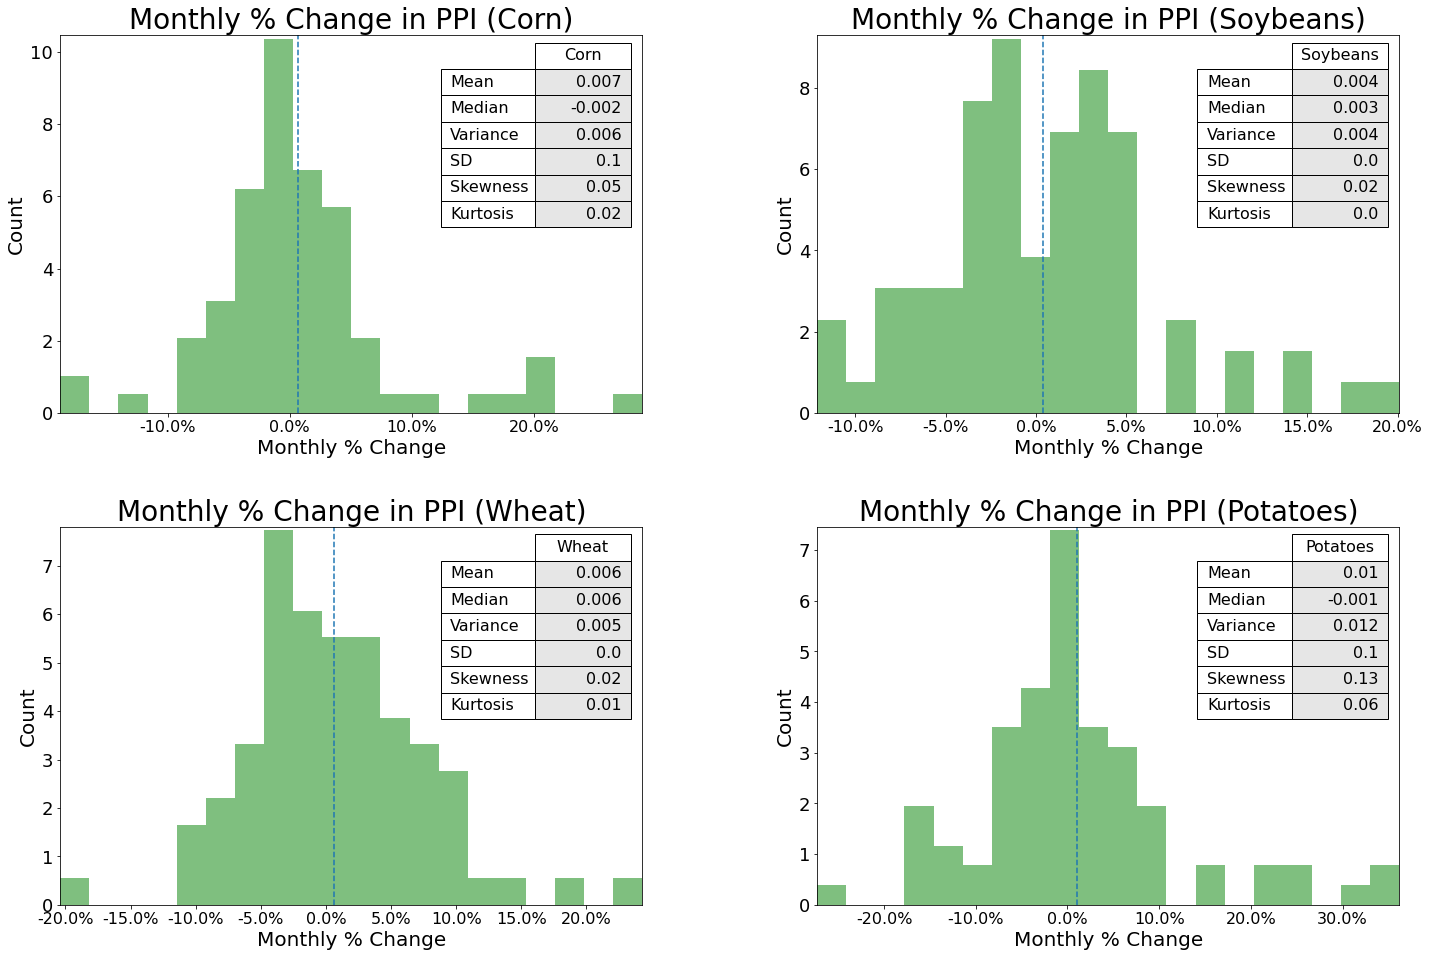

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a monthly percent of change...
commodity_df = commodity_df.pct_change().round(3)

# Generate a cumulative monthly change...
commodity_cumulative_change_df = commodity_df.fillna(0).cumsum()


commodity_df.dropna(how='any', axis=0, inplace=True)

# Stats
commodity_stats_df = gather_statistics(commodity_df)

fig, ax = plt.subplots(2,2, figsize = (24,16))
commodity_df.hist(bins=20, 
                       alpha=0.5, 
                       density=True, 
                       label = commodity_df.keys(),
                       ax=ax, 
                       color = "green")
        
# plot table with summary statistics
for row in range(len(ax)):
    for column in range(len(ax[row])):
        fig_item = ax[row][column]
        
        # identify stock
        ppi = fig_item.get_title()
        fig_item_title = 'Monthly % Change in PPI (' + ppi + ')'
        
        # save summary statistics data
        hist_data = commodity_stats_df[ppi] 
        
        # plot summary statistics within the histogram plot
        stats =table(fig_item, 
                     hist_data, 
                     colWidths=[.15], 
                     cellColours=[[(.9,.9,.9)]]*6, 
                     loc = "upper right")
        stats.scale(1.1,2.2)
        stats.auto_set_font_size(False)
        stats.set_fontsize(16)
        
        # axis vertical line
        fig_item.axvline(x = hist_data.loc["Mean"], ls="--")
        
        # x axis stuff
        ticks_loc = fig_item.get_xticks().tolist()
        fig_item.xaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
        fig_item.set_xlabel('Monthly % Change', fontsize=20)
        fig_item.set_xticklabels([str(round(x*100,1)) + "%"  for x in ticks_loc], fontsize=16)   
        
        # y axis stuff
        ticks_loc = fig_item.get_yticks().tolist()
        fig_item.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
        fig_item.set_ylabel("Count", fontsize = 20)
        fig_item.set_yticklabels([str(int(y)) for y in ticks_loc], fontsize=18)
        fig_item.set_title(fig_item_title, fontsize = 28)
        
        # Turn of grid lines
        fig_item.grid(False)    

plt.show()
plt.savefig('Crop Commodity PPI.png')

## Cumulative Change in Crop-specific Producers' Price Index (Since 2010)
Input costs for corn, wheat, and soybean crops appear to have declined starting in 2012, while input costs for potoates have steadily increased since 2013. All four crop types have experience sharp increases in input costs since the start of the COVID-19 pandemic. Again, not necessarily indicative of the direction of used equipment prices, but I do find curious the differences in cumulative change in PPI for corn, wheat, and soybeans versus potatoes. Further investigation into the drivers of potato input costs would be an interesting subject.

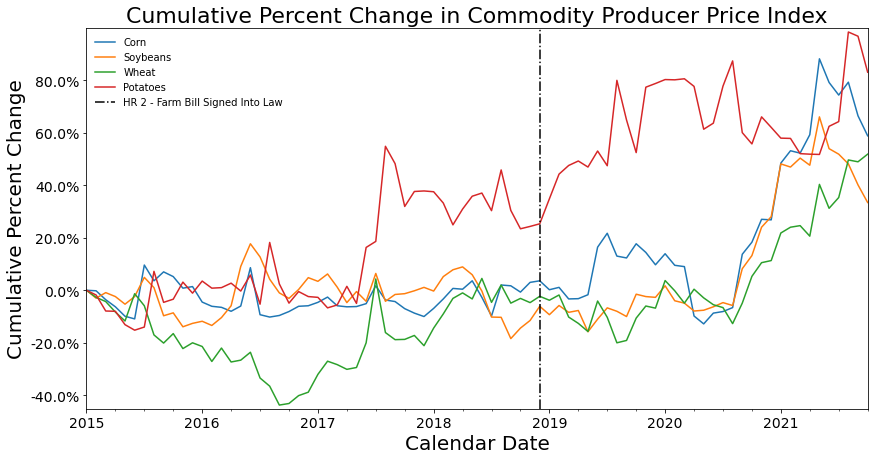

In [12]:
# set figure & sub-figure items
fig, ax = plt.subplots(figsize = (14,7))

#create line plot
commodity_cumulative_change_df.plot.line(ax=ax, legend=True)

# manage y axis stuff
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels([str(round(y*100,0)) + "%" for y in ticks_loc], fontsize = 14)
plt.axvline(datetime.datetime(2018, 12, 20), color = 'black', linestyle='-.', label = 'HR 2 - Farm Bill Signed Into Law ')

# Manage items in whole figure
plt.title("Cumulative Percent Change in Commodity Producer Price Index", fontsize =22)
plt.xticks(fontsize = 14)
plt.xlabel("Calendar Date", fontsize = 20)
plt.ylabel("Cumulative Percent Change", fontsize = 20)
plt.legend(loc = 'upper left', fontsize='medium', frameon=False)

plt.savefig('PendingDeliveryTime.png')

## Inflation Break-even Rate

The 5-year inflation break even rate reflects the expected rate of inflation over the next five year; this could be considered the short-term expectation of inflation. Conversely, the 30-year rate is the long-term expected inflation rate and the difference between the 5-year and the 30-year break even rates provide insight into short-term inflation expectations. Positive percentages indicate expected short and near-term inflation pressure.

Interesting to see that during the the broad COVID-19 shudown, break-even rates indicated little to no expectation of increase inflation pressure.

C:\Users\SAND8464\AppData\Local\Temp/ipykernel_8620/2635256107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  break_df2['Spread: 5YR less 30YR'] = break_df2['5 YR Break-even'] - break_df2['30 YR Break-even']


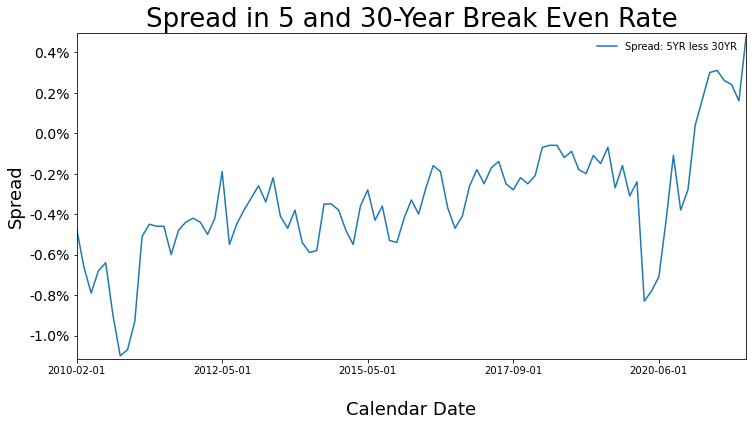

In [13]:
# Prep a new dataset
break_df2 = breakeven_df[['5 YR Break-even', '30 YR Break-even']]
break_df2['Spread: 5YR less 30YR'] = break_df2['5 YR Break-even'] - break_df2['30 YR Break-even']
break_df2 = break_df2[['Spread: 5YR less 30YR']]

# Plot the data
fig, ax = plt.subplots(figsize = (12,6))
break_df2.plot.line(ax=ax, legend=True)

# y axis stuff
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels([str(round(y,2)) + "%" for y in ticks_loc], fontsize = 14)

# x axis
ax.xaxis.axis_date()

# Whole figure stuff...
plt.title("Spread in 5 and 30-Year Break Even Rate", fontsize = 26)
plt.legend(frameon=False, fontsize='medium')
plt.ylabel("Spread", fontsize = 18)
plt.xlabel('\nCalendar Date', fontsize = 18)

plt.savefig('Breakeven.png')

## Global Aluminum Price and Steel-related Producer Price Indexes
Now, let's look at steel production and stock prices for those companies producing steel and manufacturing durable goods from steel. Again, the curious issue is that manufacturers' stock prices follow the same general increasing pattern. Additionally, according to the Fed's Producer Price Indexes for hot and cold-rolled steel products, those manufactuers' input costs have been sharply higher in 2021. The sharp drop in 2020 occurred shortly after the first reported death from the coronavirus (Allday, 2020).

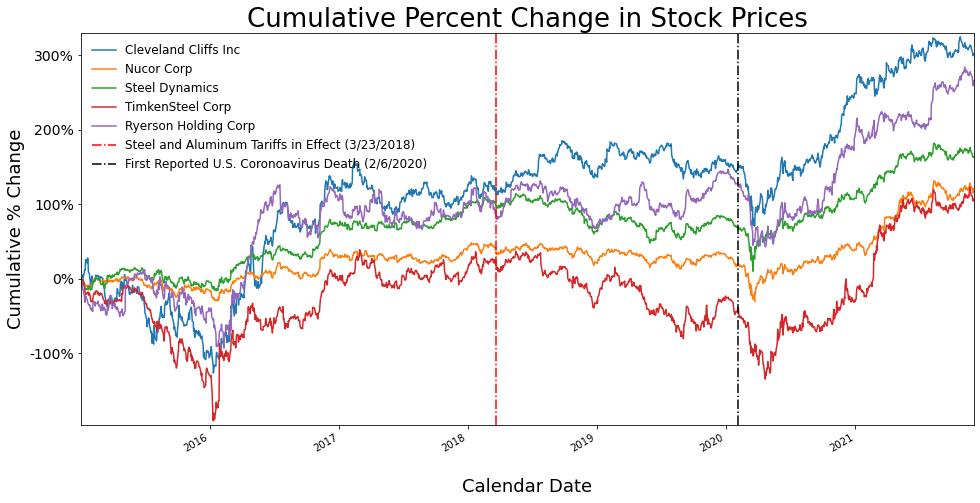

In [14]:
steel_pct_chg = steel_df.pct_change().fillna(0).cumsum()

fig, ax = plt.subplots(figsize = (16,8))
steel_pct_chg.plot.line(ax=ax, legend=True)

# y axis stuff
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels([str(int(y *100)) + "%" for y in ticks_loc], fontsize = 14)

# x axis
ax.xaxis.axis_date()
plt.axvline(datetime.datetime(2018, 3, 23), color = 'red', linestyle='-.', label = 'Steel and Aluminum Tariffs in Effect (3/23/2018)')
plt.axvline(datetime.datetime(2020, 2, 6), color = 'black', linestyle='-.', label = 'First Reported U.S. Coronoavirus Death (2/6/2020)')

# Whole figure stuff...
plt.title("Cumulative Percent Change in Stock Prices", fontsize = 26)
plt.legend(frameon=False, fontsize='large')
plt.ylabel("Cumulative % Change", fontsize = 18)
plt.xlabel('\nCalendar Date', fontsize = 18)

plt.savefig('Steel Stock Prices Percent Change.png')

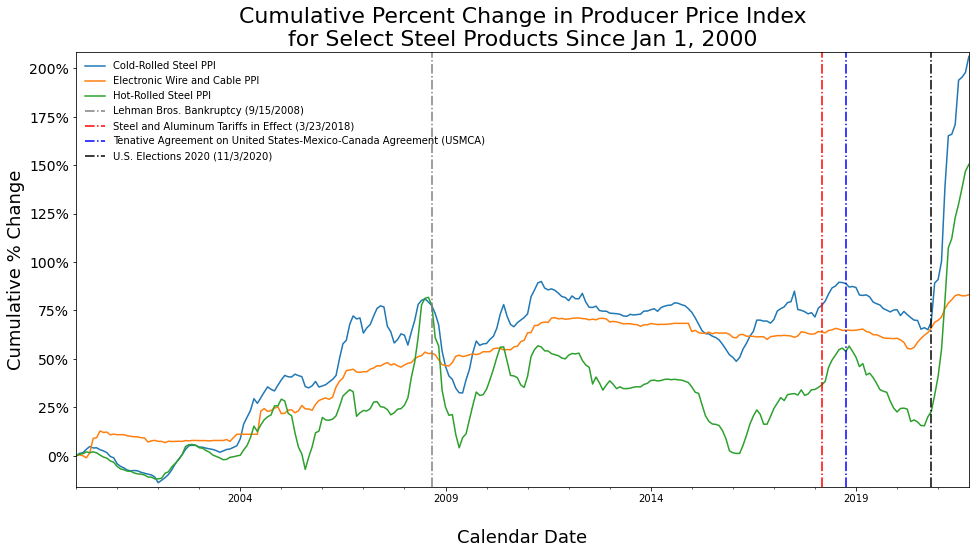

In [15]:
metals_pct_chg = metals_df.iloc[:,1:].pct_change().fillna(0).cumsum()

fig, ax = plt.subplots(figsize = (16,8))
metals_pct_chg.plot.line(ax=ax, legend=True)

# y axis stuff
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels([str(int(y*100)) + "%" for y in ticks_loc], fontsize = 14)
plt.axvline(datetime.datetime(2008, 9, 15), color = 'gray', linestyle='-.', label = 'Lehman Bros. Bankruptcy (9/15/2008)')
plt.axvline(datetime.datetime(2018, 3, 23), color = 'red', linestyle='-.', label = 'Steel and Aluminum Tariffs in Effect (3/23/2018)')
plt.axvline(datetime.datetime(2018,10, 1), color = 'blue', linestyle='-.', label = 'Tenative Agreement on United States-Mexico-Canada Agreement (USMCA)')
plt.axvline(datetime.datetime(2020, 11, 3), color = 'black', linestyle='-.', label = 'U.S. Elections 2020 (11/3/2020)')


# Whole figure stuff...
plt.title("Cumulative Percent Change in Producer Price Index\nfor Select Steel Products Since Jan 1, 2000", fontsize = 22)
plt.legend(frameon=False, fontsize='medium')
plt.ylabel("Cumulative % Change", fontsize = 18)
plt.xlabel('\nCalendar Date', fontsize = 18)

plt.savefig('Steel PPI Percent Change.png')

### Production of Steel and Machinery
So, if input costs to producing steel durable goods remains high -- and perhaps no expected decline in the near future -- is the stock price speculative in nature do to orders, or is there increased production to warrant to explain the prices? Give the Fed's Industrial Production indicies related to steel and steel durable goods, I'd suggest production quantity has little to do with the stock price. As one might expect, production dropped sharply in March 2020 and has inconsistent levels since then.

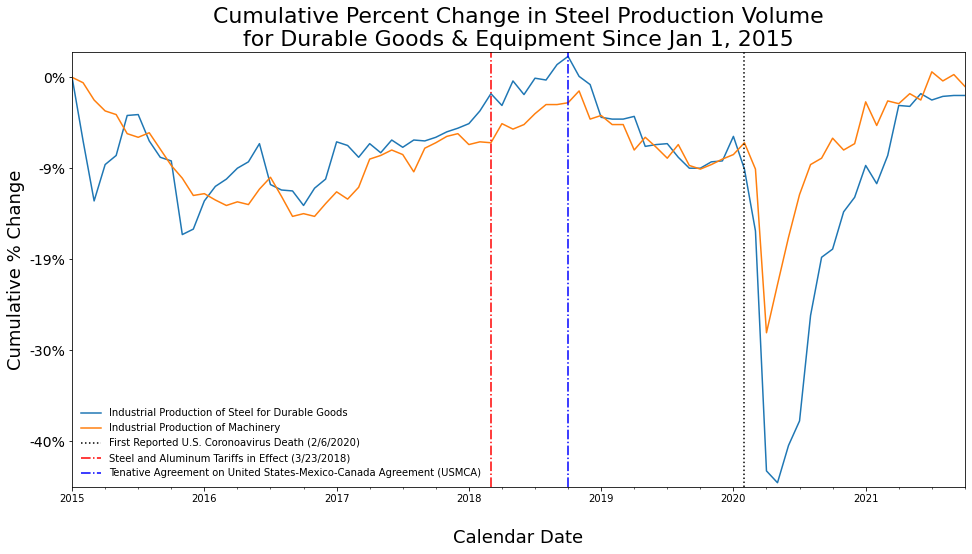

In [16]:
production_df = pd.read_csv('Production.csv')
production_df['DATE'] = pd.to_datetime(production_df['DATE'])
production_df.set_index('DATE', inplace=True)

production_chg_df = production_df.pct_change().round(3).fillna(0).cumsum()

fig, ax = plt.subplots(figsize = (16,8))
production_chg_df.plot.line(ax=ax, legend=True)

# y axis stuff
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels([str(int(y*100)) + "%" for y in ticks_loc], fontsize = 14)
plt.axvline(datetime.datetime(2020, 2, 6), color = 'black', linestyle=':', label = 'First Reported U.S. Coronoavirus Death (2/6/2020)')
plt.axvline(datetime.datetime(2018, 3, 23), color = 'red', linestyle='-.', label = 'Steel and Aluminum Tariffs in Effect (3/23/2018)')
plt.axvline(datetime.datetime(2018,10, 1), color = 'blue', linestyle='-.', label = 'Tenative Agreement on United States-Mexico-Canada Agreement (USMCA)')

# Whole figure stuff...
plt.title("Cumulative Percent Change in Steel Production Volume\nfor Durable Goods & Equipment Since Jan 1, 2015", fontsize = 22)
plt.legend(frameon=False, fontsize='medium')
plt.ylabel("Cumulative % Change", fontsize = 18)
plt.xlabel('\nCalendar Date', fontsize = 18)

plt.savefig('Steel Production Percent Change.png')

## Produce Price Indexes for Farm Equipment Manufacturing

An examination of agriculture equipment-related Producer Price Indexes indicate a sharp run-up in the related indicies since roughly the second quarter of 2018 (2018 Q2).

With such a sharp increase, there must be some stimulus, perhaps:
- [Tax Cuts and Jobs Act](https://www.agcountry.com/News/2018/January/2018-tax-reform)
- [Farm Bill](https://www.congress.gov/bill/115th-congress/house-bill/2)
- [Steel and Aluminum Tariffs](https://www.equipmentdealer.org/news/article/the-ag-equipment-industry-weighs-in-on-taxes-and-tariffs/)    

With respect to the sharp increase in 2021, I don't know I can tease out exactly what is responsible. Perhaps it's generalized inflation, a continued labor shortage, or if the steel production capacity and prices are the underlying root cause.

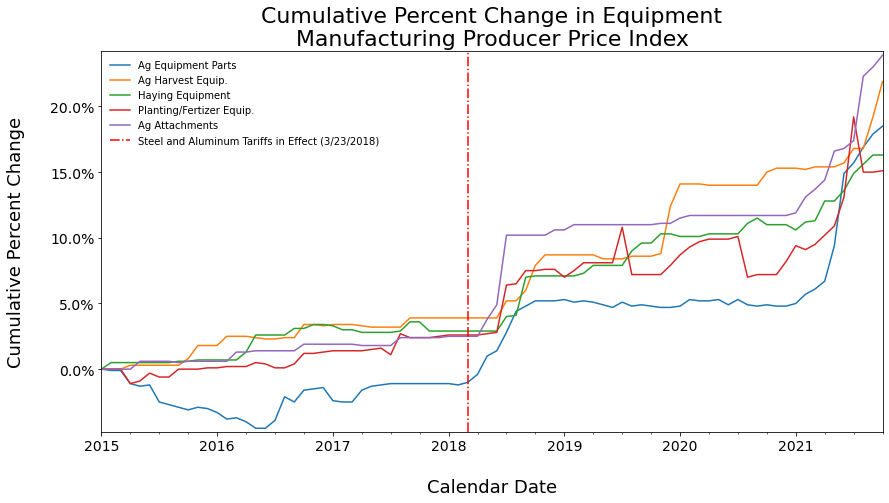

In [17]:
eqp_pct_chg = equipment_df.pct_change().round(3).fillna(0).cumsum()

# set up plot figure
fig, ax = plt.subplots(figsize = (14,7))

# Set up line plot
eqp_pct_chg.plot.line(ax=ax, legend=True)

# Y axis stuff
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels([str(round(y*100,1)) + "%" for y in ticks_loc], fontsize = 14)
plt.axvline(datetime.datetime(2018, 3, 23), color = 'red', linestyle='-.', label = 'Steel and Aluminum Tariffs in Effect (3/23/2018)')

# Overall plot stuff
plt.title("Cumulative Percent Change in Equipment\nManufacturing Producer Price Index", fontsize = 22)
plt.xlabel("\nCalendar Date", fontsize = 18)
plt.ylabel("Cumulative Percent Change\n", fontsize = 18)
plt.xticks(fontsize=14)
plt.legend(loc = 'upper left', fontsize = 'medium', frameon=False)

plt.savefig('Equipment Mfg PPI Percent Change.png')

### Open Manufacturing Jobs and the Labor Participation Rate

One interpretation of the data suggests that in the manufacturing of durable good, the number of open jobs has risen by 140% since January 2016 and yet average hourly wage for workings in the durable good sector has nominally increased and the labor force participation rate continues to decline. The overall trend is such that more manufacturing jobs seem to be available, yet the number of workers to fill those jobs continues to decline. Again, a very curious thing, but if one looks at the labor participation rates, one will find that this is not a new phenomena. Rather, the gap in jobs and labor participation rates dates back to the early 1990s.

As

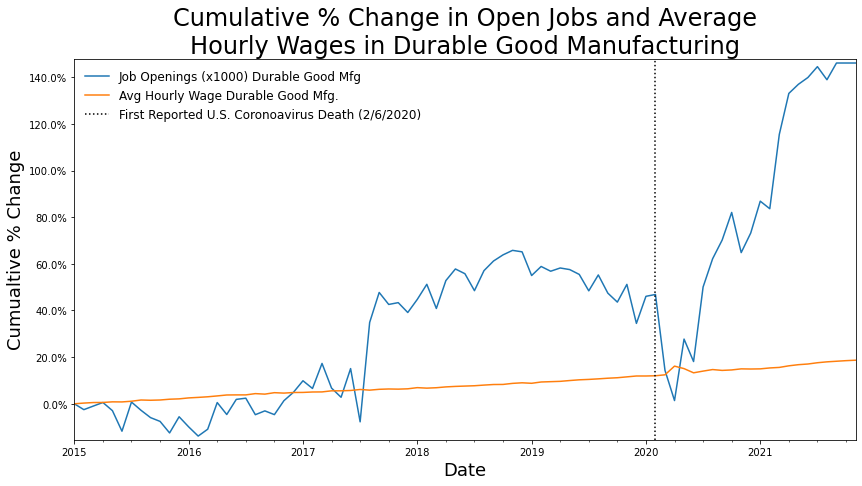

In [18]:
jobs_df = employment_df[['Job Openings (x1000) Durable Good Mfg']].pct_change()
wage_df = employment_df[['Avg Hourly Wage Durable Good Mfg.']].pct_change()

# jobs_wage_df = employment_df[['Job Openings (x1000) Durable Good Mfg']].pct_change()
jobs_df.fillna(0, inplace=True)
wage_df.fillna(0, inplace=True)

# jobs_wage_df
jobs_df = jobs_df.cumsum()
wage_df = wage_df.cumsum()

fig, ax = plt.subplots(figsize = (14,7))
jobs_df.plot.line(ax=ax, legend=True)
wage_df.plot.line(ax=ax, legend=True)

#x axis stuff
ax.set_xlabel("Date", fontsize = 18)

#y axis
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels([str(round(y,3)*100) + '%' for y in ticks_loc])
ax.set_ylabel('Cumualtive % Change', fontsize = 18)
plt.axvline(datetime.datetime(2020, 2, 6), color = 'black', linestyle=':', label = 'First Reported U.S. Coronoavirus Death (2/6/2020)')
# plt.axvline(datetime.datetime(2018, 3, 23), color = 'red', linestyle=':', label = 'Steel and Aluminum Tariffs in Effect (3/23/2018)')

plt.legend(fontsize = 'large', frameon=False)
plt.title("Cumulative % Change in Open Jobs and Average\nHourly Wages in Durable Good Manufacturing", size = 24)

plt.savefig('Mfg Jobs and Wages.png')

### A Widening Gap in Population and Labor Participation
Examining the civilian labor participation rate and the civilian labor population the data indicates that since 2016, the number of workers increased by more than 1.0%. Conversely, the cumulative monthly change in the labor participation rate declined approximately 1.5% in the same period. 

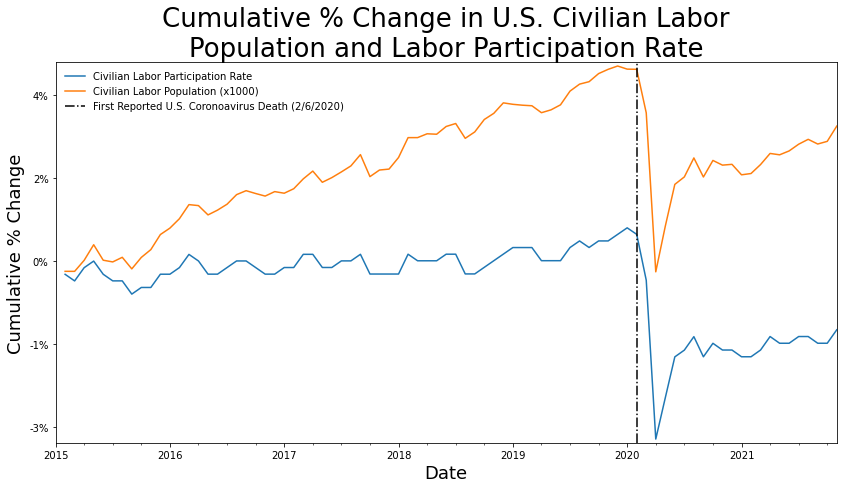

In [19]:
cumulative_employment_df = employment_df[['Civilian Labor Participation Rate', 
                                          'Civilian Labor Population (x1000)']].pct_change().cumsum()

fig, ax = plt.subplots(figsize = (14,7))
cumulative_employment_df.plot.line(ax=ax, legend=True)

#x axis stuff
ax.set_xlabel("Date", fontsize = 18)

#y axis
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels([str(int(y*100)) + '%' for y in ticks_loc])
ax.set_ylabel('Cumulative % Change', fontsize = 18)
plt.axvline(datetime.datetime(2020, 2, 6), color = 'black', linestyle='-.', label = 'First Reported U.S. Coronoavirus Death (2/6/2020)')

plt.title("Cumulative % Change in U.S. Civilian Labor\nPopulation and Labor Participation Rate", fontsize = 26)
plt.legend(fontsize = "medium", frameon=False)

plt.savefig('Labor Participation.png')

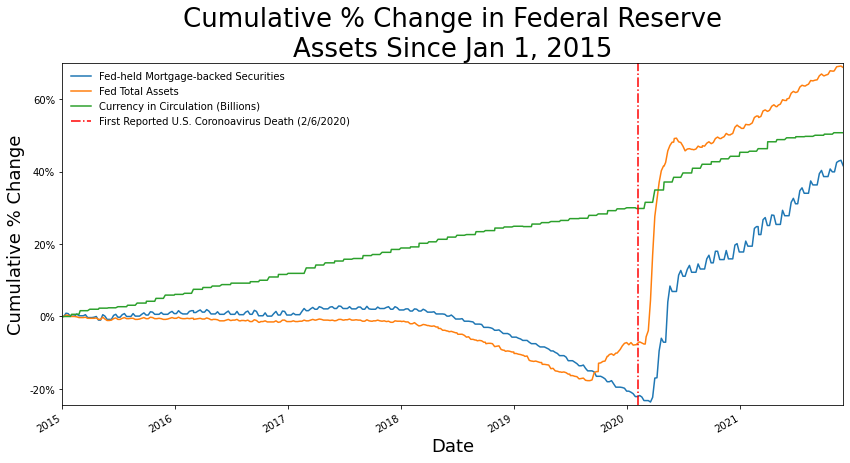

In [20]:
fed_asset_df = pd.read_csv('Federal Reserve Assets.csv')
fed_asset_df['DATE'] = pd.to_datetime(fed_asset_df['DATE'])
fed_asset_df.set_index('DATE', inplace=True)
# fed_asset_df

fed_asset_pct_chg = fed_asset_df.pct_change().round(3)

fed_asset_pct_chg.replace([np.inf, -np.inf], np.nan, inplace=True)
fed_asset_pct_chg.fillna(0, inplace=True)

fed_asset_cumulative = fed_asset_pct_chg.cumsum()

fig, ax = plt.subplots(figsize = (14,7))
fed_asset_cumulative.plot.line(ax = ax, legend=True)

#x axis stuff
ax.set_xlabel("Date", fontsize = 18)

#y axis
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mtick.FixedLocator(ticks_loc))
ax.set_yticklabels([str(int(y*100)) + '%' for y in ticks_loc])
ax.set_ylabel('Cumulative % Change', fontsize = 18)
plt.axvline(datetime.datetime(2020, 2, 6), color = 'red', linestyle='-.', label = 'First Reported U.S. Coronoavirus Death (2/6/2020)')

plt.title("Cumulative % Change in Federal Reserve\nAssets Since Jan 1, 2015", fontsize = 26)
plt.legend(fontsize = "medium", frameon=False)

plt.savefig('Fed Asset Change Percent.png')

## Conclusion

The data suggests that increase prices for new and used agricultural equipment is likely due to three key factors. First, producers' (e.g., farmers) net farm income has increased over the last 24 to 30 months. Second, the major farm equipment manufacturers' production numbers have declined due in large part to the COVID-19 pandemic. Third, the data suggests that producers are using their additional income to purchase additional equipment. With increased demand and a constrained supply, it's natural to expect prices for good (e.g., ag equipment) to increase. 

With respect to farm incomes, much of the most recent gains have come in the form of direct government payments, which started in the later half of 2018. During that time, the Department of Agriculture and Congress passed several bills providing payments to those farmers hurt by tarrifs on crop exports. Those tariffs placed by foreign countries were reponses to Trump Administration tariffs placed on steel and aluminum imports. 

The original intent of this project was to better understand the run-up in John Deere's stock price and to examine what possible indicators could signal a turn in prices paid for agricultural equipment. I believe John Deere's current stock price reflects assumptions of increased revenue based upon outstanding equipment orders and continued demand borne out of increased farm incomes. Given the increasing counts of pending orders and the increasing expected delivery timelines, one might assume that John Deere has a healthy order pipeline. Assuming John Deere can find cost reductions through operational efficiencies in lieu of higher input costs, the should remain profitable.

Prior to beginning this project, I invested time in developing linear regression models used to predict asking prices for used ag equipment. The most recent model results have an unacceptable high root mean squared error (RMSE); it is my belief that a predictive model capable of predicting retail asking prices under $2,500 is not achievalble given the quality of data to which I have access. Alternatively, I feel closely monitoring farm incomes, commodity prices, as well as Federal Reserve assets might prove more valuable to understanding when pricing trends might change. I suspect once Congress and the Department of Agriculture suspends or reduces the direct payments to farmers and crop subsidies, then farm incomes will dip and thereby temper the demand for new equipment.

While exploring stock prices, commodity prices, steel prices, and labor force statistics, I’ve decided to omit analyis of data I've collected related to retail asking prices for used tractors. I currently believe relying on the asking price predictive model as the “canary in the coal mine” is an inadequate substitute for other leading indicators.

## Bibliography

"AGCO: Challenger, Fendt, Massey Ferguson, Valtra Farm Equipment." AGCO. November 28, 2021, https://www.agcocorp.com/

"Alamo Group - Home." Alamo Group. November 28, 2021, https://www.alamo-group.com/

Allday, Kawahar. (2020). *First known U.S. coronavirus death occurred on Feb. 6 in Santa Clara County.*  San Francisco Chronicle. Retrieved from San Francisco Chronicle; https://www.sfchronicle.com/health/article/First-known-U-S-coronavirus-death-occurred-on-15217316.php, December 5, 2021.

Board of Governors of the Federal Reserve System (US), Assets: Securities Held Outright: Mortgage-Backed Securities: Wednesday Level [WSHOMCB], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WSHOMCB, November 28, 2021.

Board of Governors of the Federal Reserve System (US), Assets: Total Assets: Total Assets: Wednesday Level [RESPPANWW], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RESPPANWW, November 28, 2021.

Board of Governors of the Federal Reserve System (US), Industrial Production: Manufacturing: Durable Goods: Raw Steel (NAICS = 3311,2pt.) [IPN3311A2RS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN3311A2RS, November 28, 2021.

Board of Governors of the Federal Reserve System (US), Industrial Production: Manufacturing: Durable Goods: Machinery (NAICS = 333) [IPG333S], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPG333S, November 27, 2021.

"CNH Industrial - Homepage." CNH Industrial. November 28, 2021, https://www.cnhindustrial.com/en-us/Pages/homepage.aspx

Federal Reserve Bank of St. Louis, 5-Year Breakeven Inflation Rate [T5YIE], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/T5YIE, November 28, 2021.

Federal Reserve Bank of St. Louis, 30-year Breakeven Inflation Rate [T30YIEM], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/T30YIEM, November 28, 2021.

Horsely, S. (2018). *Trump Formally Orders Tariffs On Steel, Aluminum Imports.* National Public Radio; https://www.npr.org/2018/03/08/591744195/trump-expected-to-formally-order-tariffs-on-steel-aluminum-imports, December 5, 2021.

International Monetary Fund, Global price of Aluminum [PALUMUSDM], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PALUMUSDM, November 27, 2021.

"John Deere US | Products & Services Information." John Deere. November 28, 2021, https://www.deere.com/en/index.html

"Lindsay | Irrigation, infrastructure and industrial technology solutions." Lindsay. November 28, 2021, https://www.lindsay.com/usca/en/

Ludwig von Mises Institute (2008). *PRICES AND PRODUCTION AND OTHER WORKS: F.A. HAYEK ON MONEY, THE BUSINESS CYCLE, AND THE GOLD STANDARD* Ludwig von Mises Institute. https://cdn.mises.org/prices_and_production_and_other_works.pdf

NASDAQ. (2021, November 27). Steel Dynamics Inc (STLD). [Stock quote]. Retrieved from https://finance.yahoo.com/quote/STLD

NYSE. (2021, November 27). Alamo Group Inc (ALG). [Stock quote]. Retrieved from https://finance.yahoo.com/quote/ALG

NYSE. (2021, November 27). Cleveland-Cliffs Inc (CLF). [Stock quote]. Retrieved from https://finance.yahoo.com/quote/CLF

NYSE. (2021, November 27). CNH Industrial NV (CNHI). [Stock quote]. Retrieved from https://finance.yahoo.com/quote/CNHI

NYSE. (2021, November 27). Deere & Co (DE). [Stock quote]. Retrieved from https://finance.yahoo.com/quote/DE

NYSE. (2021, November 27). Lindsay Corp (LNN). [Stock quote]. Retrieved from https://finance.yahoo.com/quote/LNN

NYSE. (2021, November 27). Nucor Corp (NUE). [Stock quote]. Retrieved from https://finance.yahoo.com/quote/NUE

NYSE. (2021, November 27). Ryerson Holding Corp (RYI). [Stock quote]. Retrieved from https://finance.yahoo.com/quote/RYI

NYSE. (2021, November 27). Titan International Inc (TWI). [Stock quote]. Retrieved from https://finance.yahoo.com/quote/TWI

NYSE. (2021, November 27). TimkenSteel Crop (TMST). [Stock quote]. Retrieved from https://finance.yahoo.com/quote/TMST

"Titan International." Titan-International. November 28, 2021, https://www.titan-intl.com/

U.S. Bureau of Labor Statistics, Producer Price Index by Industry: Farm Machinery and Equipment Manufacturing: Parts for Farm Machinery, for Sale Separately [PCU333111333111C], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCU333111333111C, September 29, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Metals and Metal Products: Cold Rolled Steel Sheet and Strip [WPU101707], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU101707, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Metals and Metal Products: Electronic Wire and Cable [WPU10260301], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU10260301, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Metals and Metal Products: Hot Rolled Steel Sheet and Strip, Including Tin Mill Products [WPU101703], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU101703, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Machinery and Equipment: Parts for Farm Machinery, for Sale Separately [WPU11140911], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU11140911, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Farm Products: Corn [WPS012202], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPS012202, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Farm Products: Soybeans [WPU01830131], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU01830131, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Farm Products: Wheat [WPU0121], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU0121, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Farm Products: Potatoes [WPU011306], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU011306, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Machinery and Equipment: Harvesting Machinery (Except Hay and Straw) and Attachments [WPU11140611], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU11140611, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Machinery and Equipment: Haying Machinery and Attachments [WPU11140711], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU11140711, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Machinery and Equipment: Planting, Seeding, and Fertilizing Machinery and Attachments [WPU11140511], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU11140511, November 28, 2021.

U.S. Bureau of Labor Statistics, Producer Price Index by Commodity: Machinery and Equipment: Farm Plows, Harrows, Rollers, Pulverizers, etc., and Attachments [WPU11140211], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/WPU11140211, November 28, 2021.

U.S. Bureau of Labor Statistics, Average Hourly Earnings of All Employees, Durable Goods [CES3100000003], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CES3100000003, November 28, 2021.

U.S. Bureau of Labor Statistics, Labor Force Participation Rate [CIVPART], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CIVPART, November 28, 2021.

U.S. Bureau of Labor Statistics, Civilian Labor Force Level [CLF16OV], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CLF16OV, November 28, 2021.

United States Department of Agriculture, Farm Service Agency. (2021) *2021 crop acreage data as of August 2, 2021.* https://www.fsa.usda.gov/Assets/USDA-FSA-Public/usdafiles/NewsRoom/eFOIA/crop-acre-data/zips/2021-crop-acre-data/2021_fsa_acres_web_as_of_080221.zip

United States Department of Agriculture, Economic Research Service. (2021). *Government payments by program.* https://data.ers.usda.gov/reports.aspx?ID=17833

United States Department of Agriculture, Economic Research Service. (2021). *Returns to operators.* https://data.ers.usda.gov/reports.aspx?ID=17837

United States Geological Survey. (2021) *US Board on Geographic Names.* https://www.usgs.gov/core-science-systems/ngp/board-on-geographic-names/download-gnis-data

Vancouver Regional Construction Association. (2020). *Candadian tariffs and safeguards on steel and aluminum.* Retrieved from Vancouver Regional Construciotn Association; https://vrca.ca/advocacy/canadian-tariffs-on-u-s-steel-and-aluminum/, December 5, 2021